In [1]:
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
np.random.seed(seed=233423)

In [3]:
n = 50000

In [4]:
unif = uniform(loc=0, scale=1)

In [5]:
runif = lambda n : unif.rvs(n)

# Travelling salesman problem

In [6]:
n_city = 100
paths = np.zeros(shape=(n_city + 1,2))
paths[:n_city,:] = runif(n_city*2).reshape(n_city,2)
paths[n_city,:] = paths[0,:]

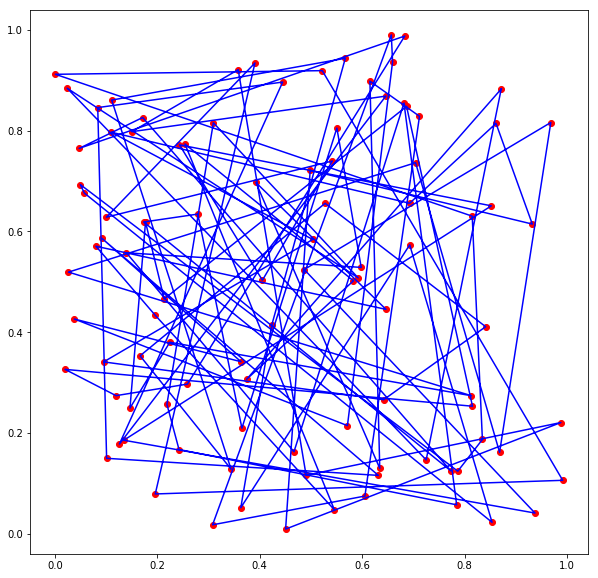

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(paths[:n_city,0], paths[:n_city,1], 'ro')
ax.plot(paths[:,0], paths[:,1], 'b-')

In [8]:
dist = lambda x,y: np.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) **2)
dists = np.zeros(shape=(n_city, n_city))
for i in np.arange(0,n_city):
    for j in np.arange(i,n_city):
        dists[i,j] = dist(paths[i,:], paths[j,:])
        dists[j,i] = dists[i,j]

In [9]:
def D(perm,dists):
    d = dists[perm[n_city-1],perm[1]]
    for i in np.arange(0,n_city-1):
        d = d + dists[perm[i],perm[i+1]]
    return d

In [10]:
def r(dists, permx, permy, T):
    return np.exp((D(permx, dists) - D(permy, dists)) / T)

In [13]:
ds = np.zeros(n)

In [18]:
T = 1/ np.log(np.arange(2,(n+1)))
perms = np.zeros(shape=(n, n_city), dtype = int) #objet
perms[0,:] = np.arange(0, n_city) #initatialisation
y = np.zeros(n_city, dtype=int)
for i in np.arange(0, n-1):
    ds[i] =  D(perms[i,:], dists)
    # simulation de y selon Q(x.)
    y[:] = perms[i,:] 
    l = int(round(runif(1)[0] * (n_city - 1)))
    l2 = int(round(runif(1)[0] * (n_city - 1)))
    tmp = y[l]
    y[l] = y[l2]
    y[l2] = tmp
    #test d'acceptation
    if (runif(1)[0] <= r(dists, perms[i,:], y[:], T[i])):
        perms[i+1,:] = y[:]
    else:
        perms[i+1,:] = perms[i,:]
ds[n-1] =  D(perms[n-1,:], dists)

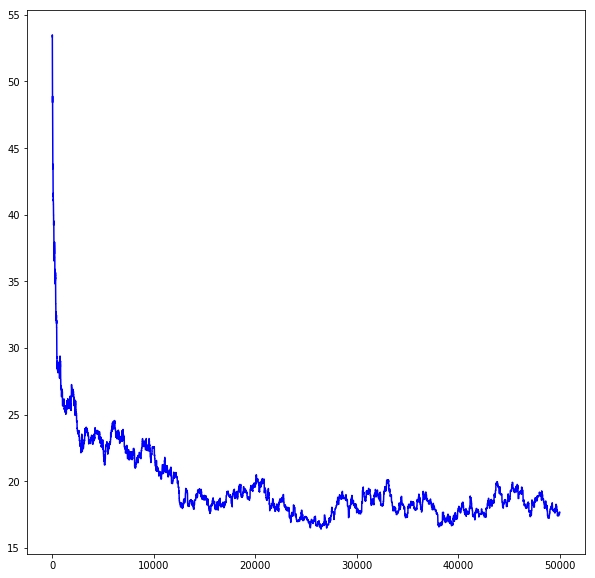

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ds,'b-')

In [27]:
best_iter = np.argmin(ds)

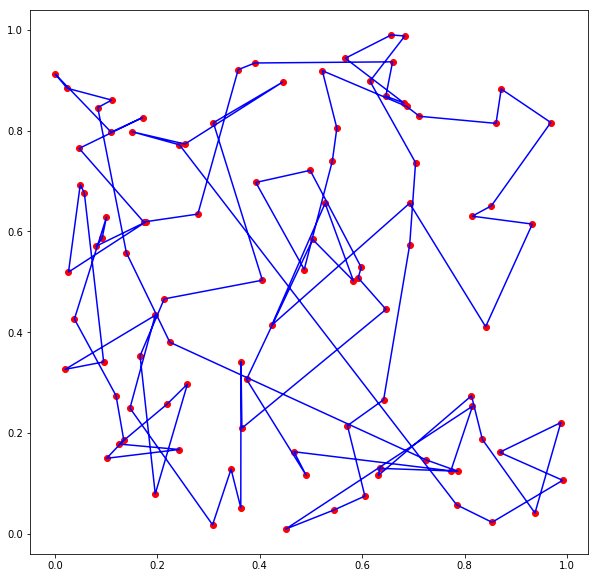

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
paths2 = np.zeros(shape=(n_city + 1,2))
paths2[:n_city,:] = paths[perms[best_iter],:]
paths2[n_city,:] = paths2[0,:]
ax.plot(paths2[:n_city,0], paths2[:n_city,1], 'ro')
ax.plot(paths2[:,0], paths2[:,1], 'b-')